<a href="https://colab.research.google.com/github/TarekAzzouni/Windmill_energy_prediction/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moving from traditional energy plans powered by fossils fuels to unlimited renewable energy subscriptions allows for instant access to clean energy without heavy investment in infrastructure like solar panels, for example.

One clean energy source that has been gaining popularity around the world is wind turbines. Turbines are massive structures that are strategically placed in perpetually windy places to generate the most energy. Wind energy is generated when the power of the atmosphere’s airflow is harnessed to create electricity. Wind turbines do this by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, etc. influence the amount of power generated.

Project management 

1) Libraries and Data Loading

2) Exploratory Analysis and Data Cleaning

3) Machine Learning : 

*   Supervised Machine Learning
*   Unsupervised Machine Learning
*   Reinforcement Machine Learning

4) Adjustment

# Import libraries 



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Reading Data

In [40]:
train = pd.read_csv('/content/train.csv')   
test = pd.read_csv('/content/train.csv')

In [41]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

# Data exploration

In [43]:
train0 = train.fillna(0)

In [44]:
train00 = train0.replace(-99.000000, 0)

In [45]:
train1 = train00.drop(["tracking_id","cloud_level","turbine_status"], axis=1)

In [46]:
train1['datetime']= pd.to_datetime(train1['datetime'],format='%Y-%m-%d %H:%M')

# Data Visualization

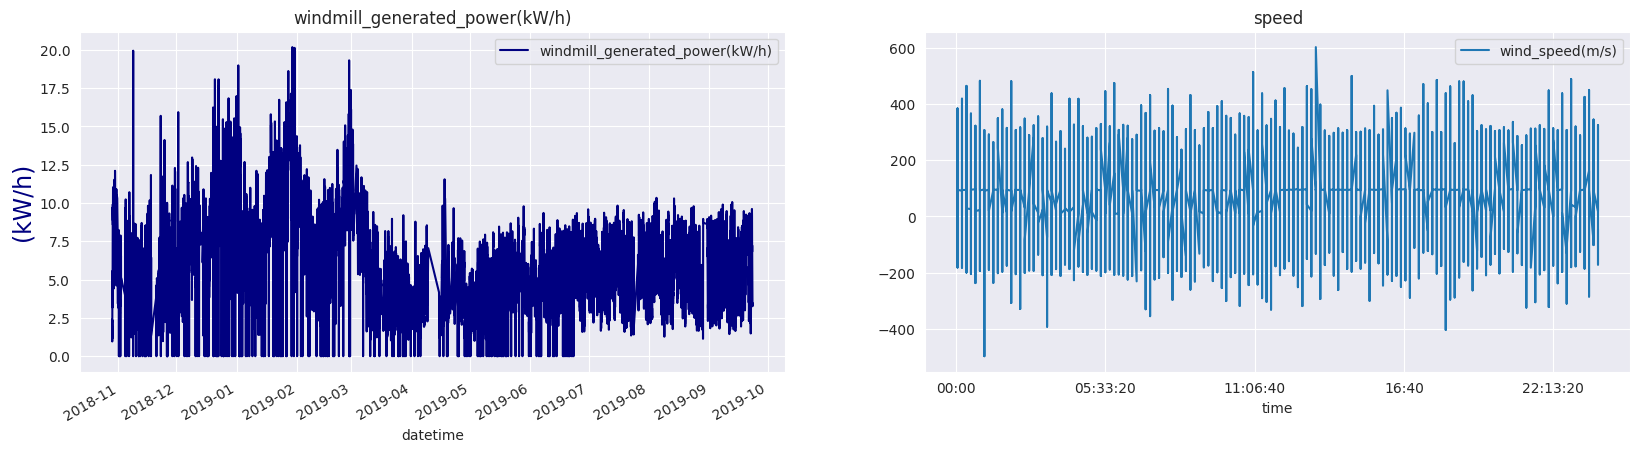

In [47]:


df_gen=train1.groupby('datetime').sum().reset_index()
df_gen['time']=df_gen['datetime'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='datetime',y='windmill_generated_power(kW/h)',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('datetime',1)[['wind_speed(m/s)']].plot(ax=ax[1])

ax[0].set_title('windmill_generated_power(kW/h)',)
ax[1].set_title('speed')
ax[0].set_ylabel('(kW/h)',color='navy',fontsize=17)
plt.show()

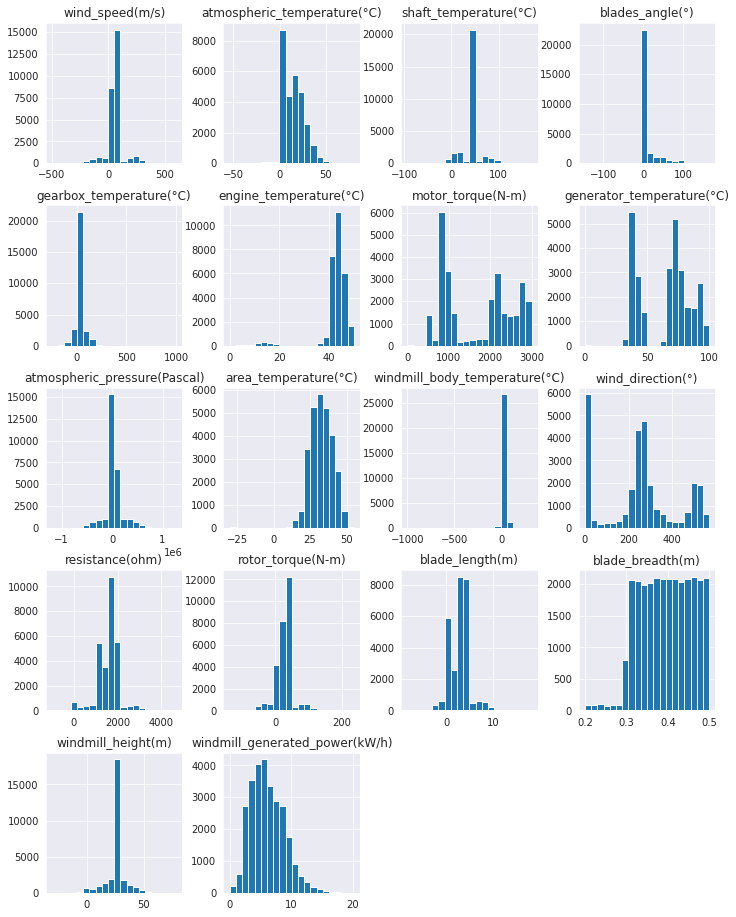

In [49]:
train1.hist(bins = 20 , figsize= (12,16)) ;

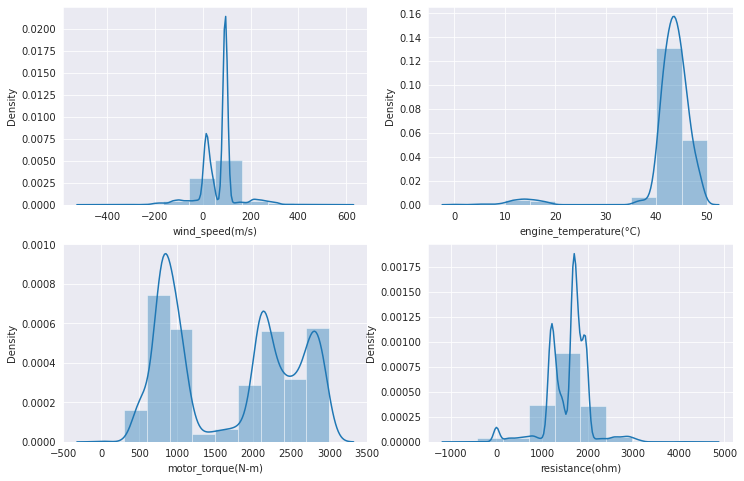

In [50]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(train1["wind_speed(m/s)"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(train1["engine_temperature(°C)"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(train1["motor_torque(N-m)"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(train1["resistance(ohm)"],bins=10, ax=ax[1][1])

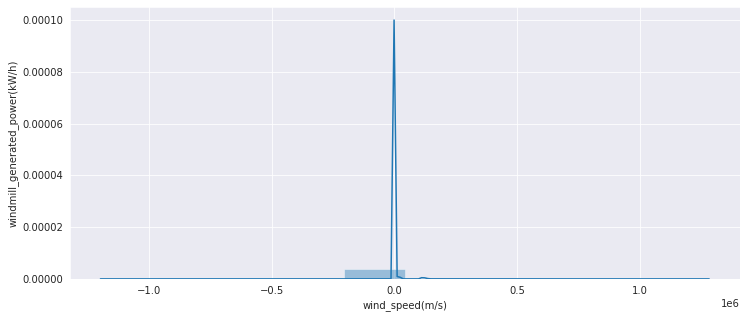

In [51]:
t2 = train1.drop(["datetime"],axis=1).values 
f = plt.figure(figsize=(12,5))

plt.xlabel('wind_speed(m/s)')
plt.ylabel('windmill_generated_power(kW/h)')

sns.distplot(t2 , bins=10 )

 # Feature detection

 Feature selection can be done in multiple ways but there are broadly 3 categories of it:
1. Filter Method
2. Wrapper Method
3. Embedded Method


##  1/ Filter Method

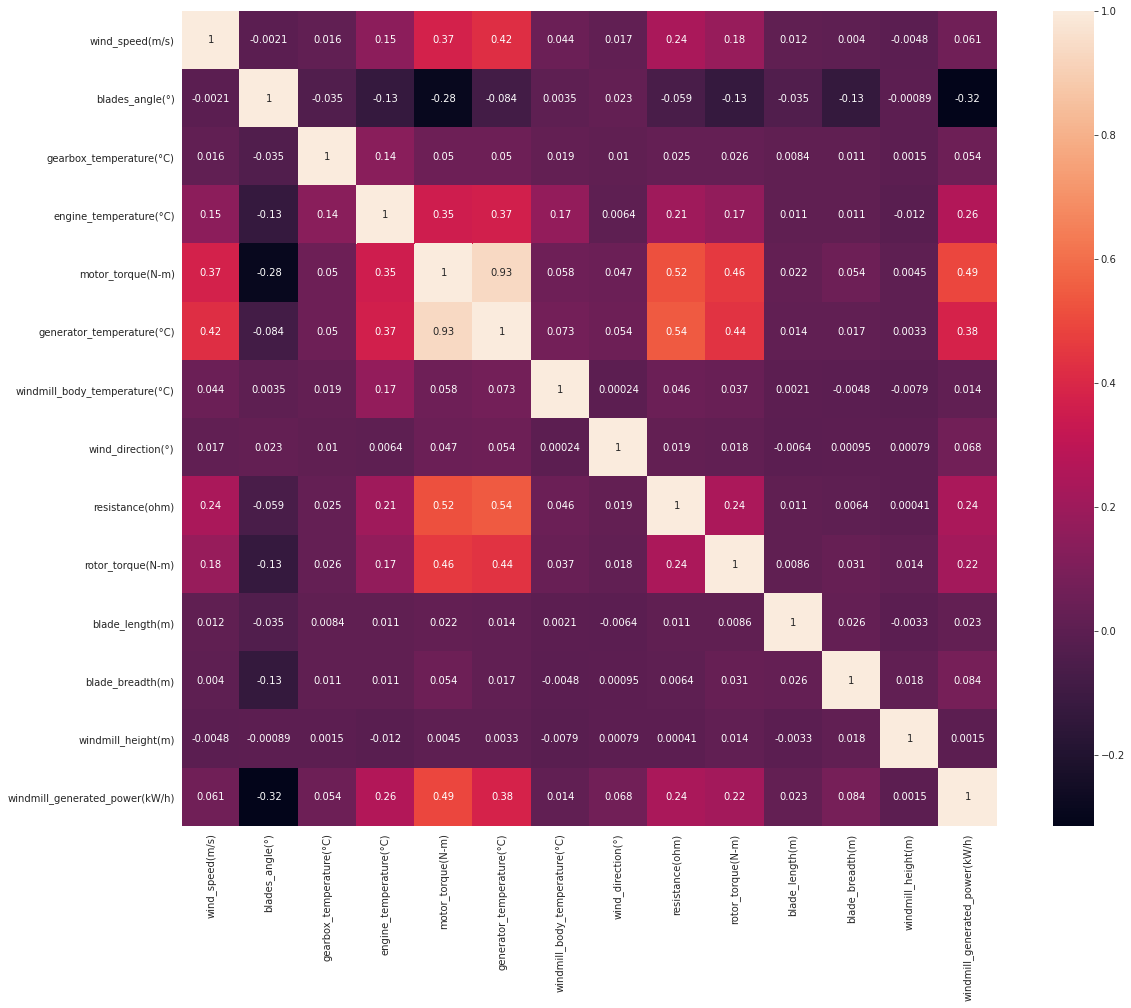

In [52]:
t1 = train1.drop(["atmospheric_temperature(°C)","shaft_temperature(°C)","atmospheric_pressure(Pascal)","area_temperature(°C)"],axis=1)
plt.subplots(figsize=(20,15))
cor = t1.corr()
sns.heatmap(cor, annot = True,square=True)

Correlation between wind and temperature and the output ( generation ) using a :

In [53]:
#Correlation with output variable
cor_target = abs(cor["windmill_generated_power(kW/h)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

motor_torque(N-m)                 0.492563
windmill_generated_power(kW/h)    1.000000
Name: windmill_generated_power(kW/h), dtype: float64

In [54]:
#Correlation with output variable
cor_target = abs(cor["motor_torque(N-m)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

motor_torque(N-m)                 1.000000
generator_temperature(°C)         0.934022
resistance(ohm)                   0.518912
rotor_torque(N-m)                 0.458484
windmill_generated_power(kW/h)    0.492563
Name: motor_torque(N-m), dtype: float64

In [55]:
#Correlation with output variable
cor_target = abs(cor["generator_temperature(°C)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

wind_speed(m/s)              0.422661
motor_torque(N-m)            0.934022
generator_temperature(°C)    1.000000
resistance(ohm)              0.544829
rotor_torque(N-m)            0.436844
Name: generator_temperature(°C), dtype: float64

## 2/ Embedded Method


In [56]:
X = t1.drop("windmill_generated_power(kW/h)",1)
y = t1["windmill_generated_power(kW/h)"] 

In [57]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

TypeError: ignored

# Machine learning Models 

## Data Pre Processing 

Since we found the importante feature we will start building our Machine Learning model. 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(train1,test_size=0.25,random_state=40)

separate important variable from non important one. 

In [60]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datetime                        28200 non-null  datetime64[ns]
 1   wind_speed(m/s)                 28200 non-null  float64       
 2   blades_angle(°)                 28200 non-null  float64       
 3   gearbox_temperature(°C)         28200 non-null  float64       
 4   engine_temperature(°C)          28200 non-null  float64       
 5   motor_torque(N-m)               28200 non-null  float64       
 6   generator_temperature(°C)       28200 non-null  float64       
 7   windmill_body_temperature(°C)   28200 non-null  float64       
 8   wind_direction(°)               28200 non-null  float64       
 9   resistance(ohm)                 28200 non-null  float64       
 10  rotor_torque(N-m)               28200 non-null  float64       
 11  bl

In [61]:
col_temp = ["gearbox_temperature(°C)","engine_temperature(°C)","generator_temperature(°C)","windmill_body_temperature(°C)"]
col_weather = ["wind_speed(m/s)","wind_direction(°)"]
col_mecha = ["blades_angle(°)","motor_torque(N-m)","resistance(ohm)","rotor_torque(N-m)"]
col_size = ["blade_length(m)","blade_breadth(m)","windmill_height(m)"]
col_target = ["windmill_generated_power(kW/h)"] 

In [62]:
feature = t1[col_mecha + col_size + col_temp + col_weather ]
target = t1[col_target]

In [63]:
#Split training dataset into independent and dependent varibales
train_X = t1[feature.columns]
train_y = t1[target.columns]

In [64]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature.columns]
test_y = test[target.columns]

## Model Implementation 

In [71]:
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor,  ExtraTreesRegressor , GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [72]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [74]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[19:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
model_data

[{'Name': 'Lasso: ',
  'Test_R2_Score': 0.30029710356732486,
  'Test_RMSE_Score': 2.3176644164355418,
  'Train_R2_Score': 0.31305467657000974,
  'Train_Time': 0.0397191047668457},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.3082024633141268,
  'Test_RMSE_Score': 2.3045345461186977,
  'Train_R2_Score': 0.32261609781483735,
  'Train_Time': 0.021567821502685547},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.8847895812217945,
  'Test_RMSE_Score': 0.9404584107155817,
  'Train_R2_Score': 0.8876453222447053,
  'Train_Time': 0.11045145988464355},
 {'Name': 'SVR:',
  'Test_R2_Score': 0.5706315893184395,
  'Test_RMSE_Score': 1.8155522913497522,
  'Train_R2_Score': 0.576815348516796,
  'Train_Time': 57.73259162902832},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.9864167296478743,
  'Test_RMSE_Score': 0.3229207031713715,
  'Train_R2_Score': 0.9872274442207073,
  'Train_Time': 38.936603307724},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.999999999998786,
  'Test_RMSE_Score':

In [76]:
df = pd.DataFrame(model_data)

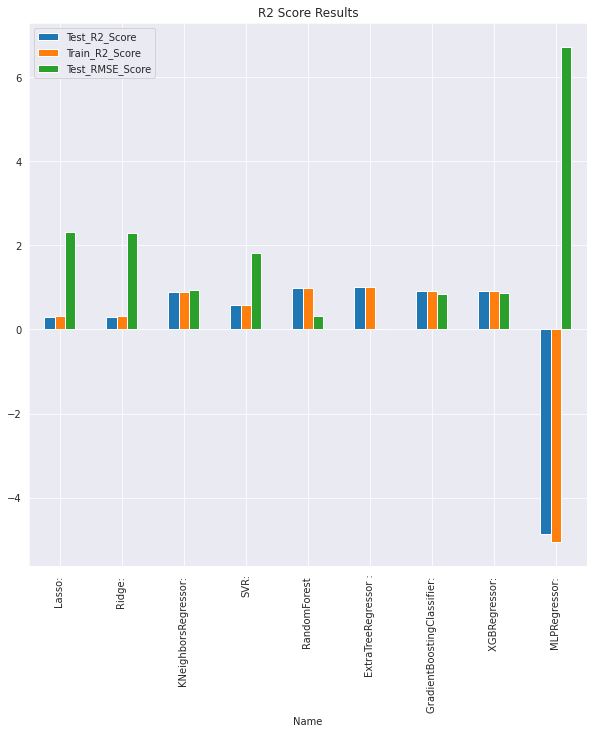

In [82]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,10)) ;

### Observation 

The best model was : 


1.   Random Forest with a R2 test score of 0.9864167296478743

2.   K Neighbors Regressor with a R2 test score of 0.8847895812217945    

3.   Extra Tree Regressor with a R2 test score 0.999999999998786

4.   Gradient Boosting Classifier with a R2 test Score: 0.9062446482458398

5.   XGB Regressor: Test R2 Score : 0.9037413878796093


For the MLP Regressor: Test R2 Score: -4.86422570104655 the result was bad. 

For the rest of the models ther were below 0.5 so we conclude that they are not good for this type of the problem




## Evaluating Machine Learning Models using Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 30.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [85]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 250}

In [86]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [87]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

0.9999999999986507

In [88]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.999999999998948

In [89]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

2.841909121924484e-06